# Set Up

### Import necessary packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

### Import data

In [42]:
relative_path = "Data/clean_us_monthly_retail_sales_1992_to_2022.csv"
df = pd.read_csv(relative_path)
df.head()

,Kind of Business,Date,Sales
0,"Retail and food services sales, total",2022-01-01,583761
1,Retail sales and food services excl motor vehi...,2022-01-01,469700
2,Retail sales and food services excl gasoline s...,2022-01-01,536142
3,Retail sales and food services excl motor vehi...,2022-01-01,422081
4,"Retail sales, total",2022-01-01,516923


In [43]:
df["Kind of Business"].unique()

array(['Retail and food services sales, total',
       'Retail sales and food services excl motor vehicle and parts',
       'Retail sales and food services excl gasoline stations',
       'Retail sales and food services excl motor vehicle and parts and gasoline stations',
       'Retail sales, total',
       'Retail sales, total (excl. motor vehicle and parts dealers)',
       'GAFO(1)', 'Motor vehicle and parts dealers',
       'Automobile and other motor vehicle dealers', 'Automobile dealers',
       'New car dealers', 'Used car dealers',
       'Automotive parts, acc., and tire stores',
       'Furniture, home furn, electronics, and appliance stores',
       'Furniture and home furnishings stores', 'Furniture stores',
       'Home furnishings stores', 'Floor covering stores',
       'All other home furnishings stores',
       'Electronics and appliance stores', 'Household appliance stores',
       'Electronics stores',
       'Building mat. and garden equip. and supplies dealers',


In [44]:
df.describe()

,Kind of Business,Date,Sales
count,24180,24180,24180
unique,65,372,16731
top,"Retail and food services sales, total",2022-01-01,(NA)
freq,372,65,492


In [45]:
df.dtypes

Kind of Business    object
Date                object
Sales               object
dtype: object

In [46]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Kind of Business            object
Date                datetime64[ns]
Sales                       object
dtype: object

In [47]:
df["Sales"] = pd.to_numeric(df["Sales"],errors="coerce")
df.dtypes

Kind of Business            object
Date                datetime64[ns]
Sales                      float64
dtype: object

In [48]:
df.dropna(subset=['Sales'], inplace=True)
df.describe()

,Date,Sales
count,23427,23427.000000
mean,2007-07-17 18:32:59.562043648,44574.681265
min,1992-01-01 00:00:00,11.000000
25%,2000-01-16 12:00:00,2611.000000
50%,2007-08-01 00:00:00,9237.000000
75%,2015-02-01 00:00:00,36925.500000
max,2022-12-01 00:00:00,741521.000000
std,NaN,92410.746793


# Analysis

## Trends

### Simple Trend

#### Trends on total retail and food services sales in the US

On the x-axis, we have months. On the y-axis, we have total monthly retail and food services sales in the US in millions of US dolars.

In [49]:
retail_food_service = df.loc[df["Kind of Business"]=="Retail and food services sales, total"]
retail_food_service.set_index('Date', inplace=True)
retail_food_service.head()

,Kind of Business,Sales
Date,,
2022-01-01,"Retail and food services sales, total",583761.0
2022-02-01,"Retail and food services sales, total",577319.0
2022-03-01,"Retail and food services sales, total",679465.0
2022-04-01,"Retail and food services sales, total",679473.0
2022-05-01,"Retail and food services sales, total",702760.0


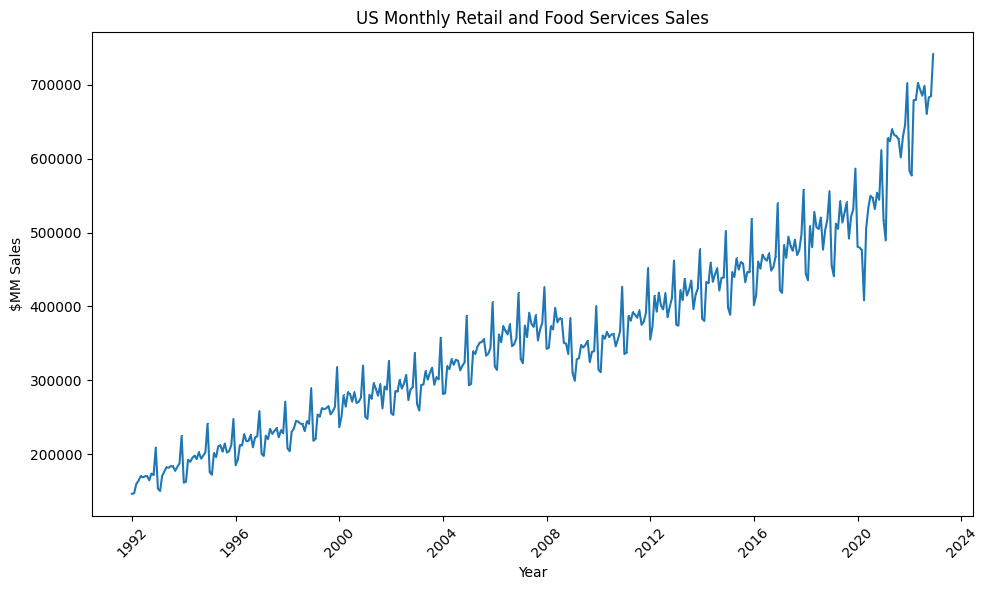

In [50]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Sort values 
retail_food_service = retail_food_service.sort_values(by = "Date")

# Plot the time series
plt.figure(figsize=(10, 6)) 
plt.plot(retail_food_service.index, retail_food_service['Sales'], marker=',', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Monthly Retail and Food Services Sales')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [51]:
year_agg_retail = retail_food_service["Sales"].resample("A").sum()
year_agg_retail.head()

Date
1992-12-31    2014102.0
1993-12-31    2153095.0
1994-12-31    2330235.0
1995-12-31    2450628.0
1996-12-31    2603794.0
Freq: A-DEC, Name: Sales, dtype: float64

In [52]:
year_agg_retail.dropna(inplace=True)

In [53]:
year_agg_retail.index

DatetimeIndex(['1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

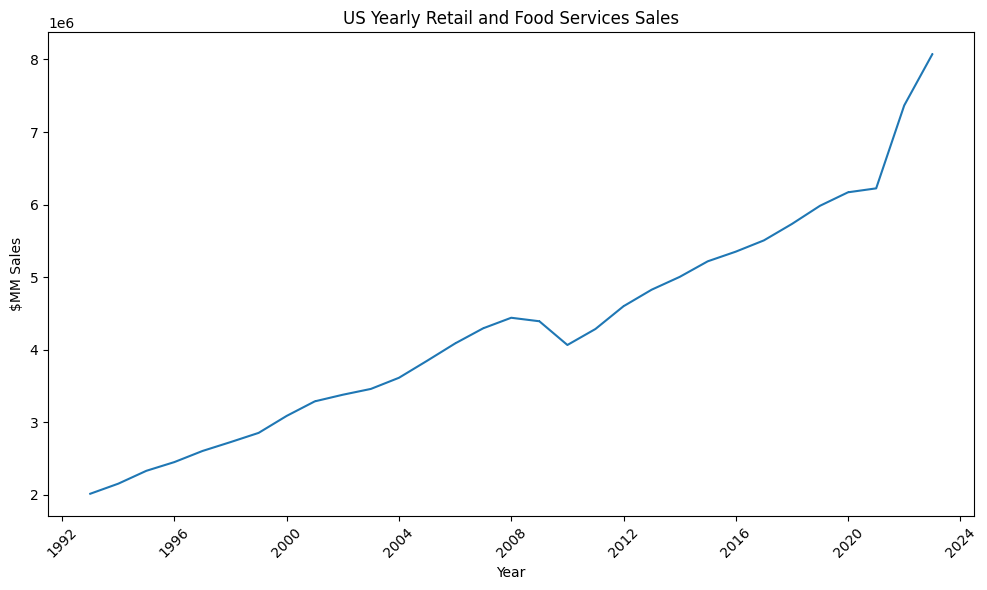

In [54]:
# Plot the time series
plt.figure(figsize=(10, 6)) 
plt.plot(year_agg_retail.index, year_agg_retail, marker=',', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Yearly Retail and Food Services Sales')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Trend Comparisons In Depth Look

Let's focus on leisure activities. Three types of retail sales that are commonly connected with leisure activities are: book stores, sporting goods stores, and hobby stores.

In [55]:
target_categories = ["Book stores","Sporting goods stores", "Hobby, toy, and game stores"]
leisure_activities = df[df["Kind of Business"].isin(target_categories)]
leisure_activities.describe()

,Date,Sales
count,1116,1116.000000
mean,2007-06-16 20:15:29.032258048,1774.757168
min,1992-01-01 00:00:00,171.000000
25%,1999-09-23 12:00:00,1004.750000
50%,2007-06-16 00:00:00,1250.000000
75%,2015-03-08 18:00:00,2238.000000
max,2022-12-01 00:00:00,7407.000000
std,NaN,1183.046837


In [56]:
# Set index to dates
leisure_activities.set_index('Date', inplace=True)

# Sort values 
leisure_activities = leisure_activities.sort_values(by = "Date")

# Group data by "Kind of Business"
grouped_leisure_activities = leisure_activities.groupby('Kind of Business')


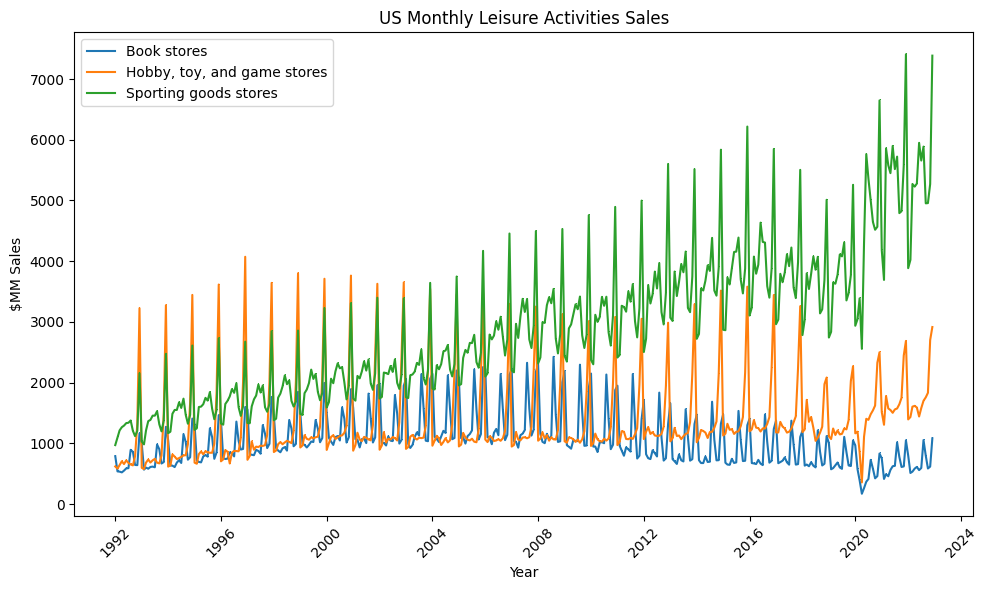

In [57]:

# Plot the time series
plt.figure(figsize=(10, 6)) 

for name, group in grouped_leisure_activities:
    plt.plot(group.index, group['Sales'], marker=',', linestyle='-', label=name)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Monthly Leisure Activities Sales')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
# Group data by "Kind of Business" and Aggregate yearly
grouped_leisure_activities = leisure_activities.groupby(['Kind of Business', pd.Grouper(freq='A')]).sum()
# Reset index to convert "Kind of Business" back to a column
grouped_leisure_activities.reset_index(inplace=True)


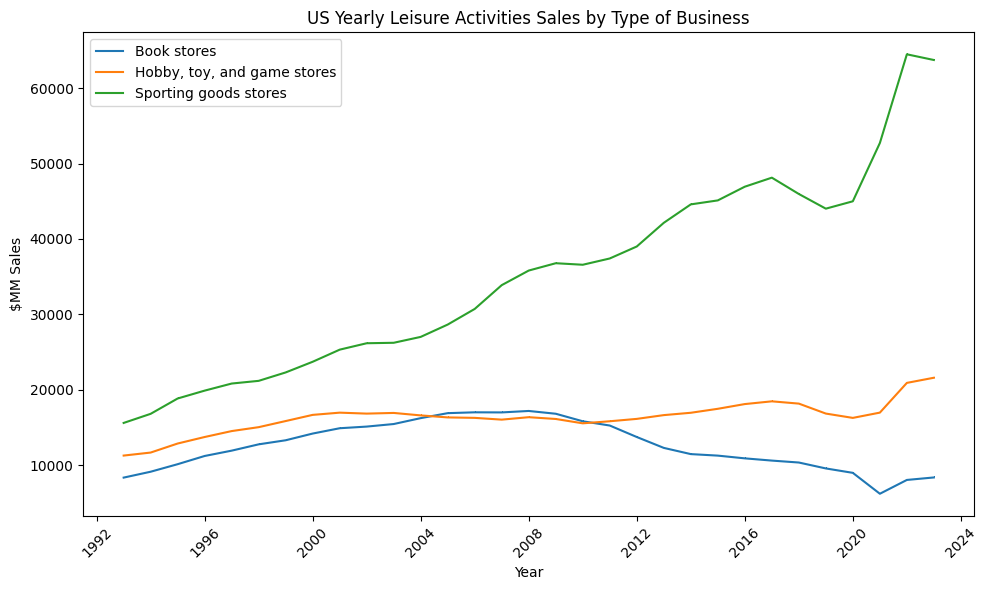

In [59]:

# Plot the time series
plt.figure(figsize=(10, 6)) 

for name, group in grouped_leisure_activities.groupby('Kind of Business'):
    plt.plot(group['Date'], group['Sales'], marker=',', linestyle='-', label=name)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title('US Yearly Leisure Activities Sales by Type of Business')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

The analysis of the annual time series graph depicting US leisure activities sales categorized by business type reveals several key trends. Notably, the data illustrates a rapid growth in sales for sporting goods, surpassing the growth rates of games and books. While the trajectory of sporting goods sales did experience a decline initially, a substantial surge was observed in 2020. This upswing can be attributed to the widespread adoption of outdoor pursuits during the COVID-19 pandemic.

Conversely, sales within the hobby, toy, and game store sector exhibited a comparatively sluggish growth pattern. In contrast to the robust expansion witnessed in sporting goods, the sales of these items advanced at a more moderate pace over the analyzed period.

Regrettably, the sales figures for bookstores portray a disheartening decline. This decline in book sales is particularly lamentable for individuals, like myself, who hold a passion for books.

### Comparison between sales at women's clothing stores and men's clothing stores

In [65]:
men_women_clothes = df.loc[(df["Kind of Business"]=="Men's clothing stores") | (df["Kind of Business"] == "Women's clothing stores")]
men_women_clothes.set_index("Date", inplace=True)
men_women_clothes.head()

,Kind of Business,Sales
Date,,
2022-01-01,Women's clothing stores,2484.0
2022-02-01,Women's clothing stores,2813.0
2022-03-01,Women's clothing stores,3793.0
2022-04-01,Women's clothing stores,3733.0
2022-05-01,Women's clothing stores,3815.0


In [66]:
# Group data by "Kind of Business" and Aggregate yearly
men_women_clothes_yearly = men_women_clothes.groupby(['Kind of Business', pd.Grouper(freq='A')]).sum()
# Reset index to convert "Kind of Business" back to a column
men_women_clothes_yearly.reset_index(inplace=True)

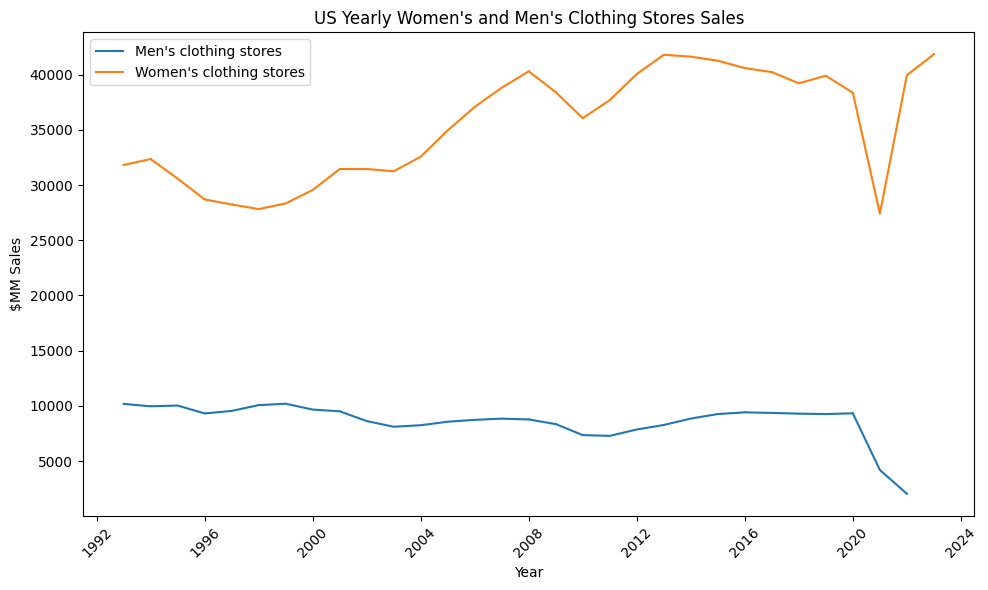

In [68]:
# Plot the time series
plt.figure(figsize=(10, 6)) 

for name, group in men_women_clothes_yearly.groupby('Kind of Business'):
    plt.plot(group['Date'], group['Sales'], marker=',', linestyle='-', label=name)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.title("US Yearly Women's and Men's Clothing Stores Sales")
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Women's clothes stores' sales has consistently outperformed the men's counterpart. Also, while men's clothes stores sales stayed consistent over the years before COVID, women's has fluctuated over the years.
Interestingly women's clothes stores' sales seems to have returned to pre-COVID years while men's are still down. 

#### How much is the difference between the genders?

In [101]:
# Filter data for Women's and Men's clothing stores separately
women_mask = df["Kind of Business"] == "Women's clothing stores"
men_mask = df["Kind of Business"] == "Men's clothing stores"

# Sort
women_clothes_data = df.loc[women_mask].sort_values("Date")
men_clothes_data = df.loc[men_mask].sort_values("Date")

# Set index to date 
women_clothes_data.set_index("Date",inplace=True)
men_clothes_data.set_index("Date",inplace= True)

women_men_diff = women_clothes_data.Sales - men_clothes_data.Sales

women_men_diff.describe()

count     350.000000
mean     2184.597143
std       570.172909
min       425.000000
25%      1771.250000
50%      2140.000000
75%      2590.500000
max      3798.000000
Name: Sales, dtype: float64

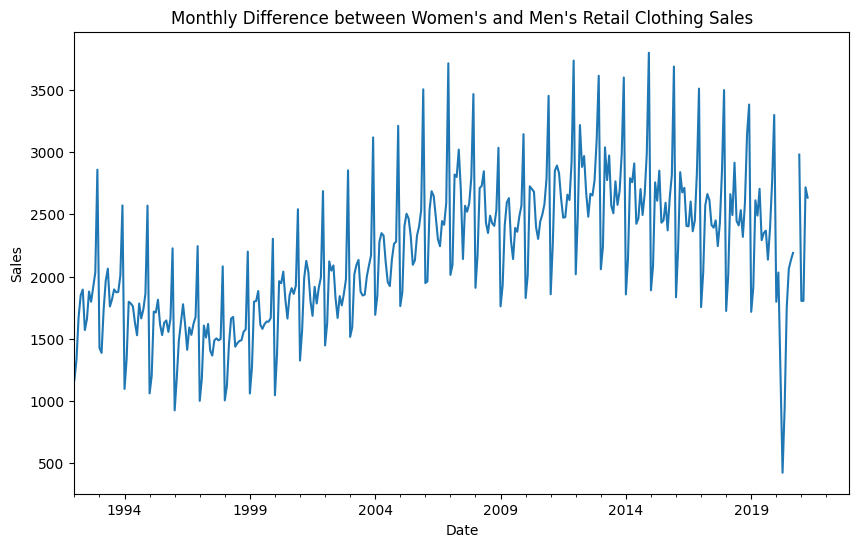

In [92]:
# Create the Series with specified attributes
women_men_diff_series = pd.Series(data=women_men_diff, index=women_men_diff.index, name='Sales')

# Plot the time series
plt.figure(figsize=(10, 6))
women_men_diff_series.plot(kind='line', title="Monthly Difference between Women's and Men's Retail Clothing Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [103]:
women_men_diff_series["2021-01-01":"2022-12-31"]

Date
2021-01-01    1805.0
2021-02-01    1805.0
2021-03-01    2717.0
2021-04-01    2634.0
2021-05-01       NaN
2021-06-01       NaN
2021-07-01       NaN
2021-08-01       NaN
2021-09-01       NaN
2021-10-01       NaN
2021-11-01       NaN
2021-12-01       NaN
2022-01-01       NaN
2022-02-01       NaN
2022-03-01       NaN
2022-04-01       NaN
2022-05-01       NaN
2022-06-01       NaN
2022-07-01       NaN
2022-08-01       NaN
2022-09-01       NaN
2022-10-01       NaN
2022-11-01       NaN
2022-12-01       NaN
Name: Sales, dtype: float64

In [105]:
men_clothes_data["2021-01-01":"2022-12-31"]

,Kind of Business,Sales
Date,,
2021-01-01,Men's clothing stores,378.0
2021-02-01,Men's clothing stores,379.0
2021-03-01,Men's clothing stores,592.0
2021-04-01,Men's clothing stores,695.0


There's some missing data from men clothing retail sales. So I'll drop the difference before 2021-04-01.

The surprising fact for me is that I expected for women's and men's clothing retail sales to walk together eliminating the seasonality but the oposite is true.

In [106]:
women_men_diff_series_yearly = women_men_diff_series.resample('Y').sum()
women_men_diff_series_yearly.drop(pd.to_datetime("2022-12-31"), inplace=True)
women_men_diff_series_yearly.drop(pd.to_datetime("2021-12-31"), inplace=True)
women_men_diff_series_yearly.tail()

Date
2016-12-31    30859.0
2017-12-31    29916.0
2018-12-31    30639.0
2019-12-31    29033.0
2020-12-31    17535.0
Freq: A-DEC, Name: Sales, dtype: float64

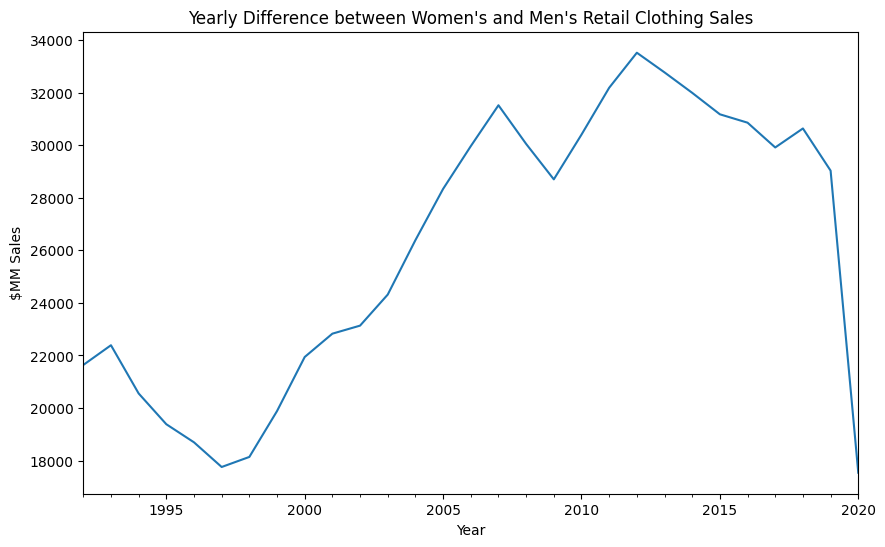

In [107]:
# Plot the time series
plt.figure(figsize=(10, 6))
women_men_diff_series_yearly.plot(kind='line', title="Yearly Difference between Women's and Men's Retail Clothing Sales")
plt.xlabel('Year')
plt.ylabel('$MM Sales')
plt.show()

The difference between women's and men's retail clothing sales had been increasing until COVID. 

In [ ]:
################################# 1 ###################################
# # Create a Figure
# fig = plt.figure(figsize=(8,3))

# # Create a bar plot of name vs grade
# plt.bar(x=df_students.Name, height=df_students.Grade)

# # Display the plot
# plt.show()

# # Create a bar plot of name vs grade
# plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

################################# 2 ###################################


# # Customize the chart
# plt.title('Student Grades') # so we know what it represents
# plt.xlabel('Student') # so we know which axis shows which data
# plt.ylabel('Grade')
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7) # makes it easier to determine the values for the bars
# plt.xticks(rotation=90) # rotate the markers so we can read them

# # Display the plot
# plt.show()

In [ ]:
# # Create a figure for 2 subplots (1 row, 2 columns)
# fig, ax = plt.subplots(1, 2, figsize = (10,4))

# # Create a bar plot of name vs grade on the first axis
# ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
# ax[0].set_title('Grades')
# ax[0].set_xticklabels(df_students.Name, rotation=90)

# # Create a pie chart of pass counts on the second axis
# pass_counts = df_students['Pass'].value_counts()
# ax[1].pie(pass_counts, labels=pass_counts)
# ax[1].set_title('Passing Grades')
# ax[1].legend(pass_counts.keys().tolist())

# # Add a title to the Figure
# fig.suptitle('Student Data')

# # Show the figure
# fig.show() 

# Statistical Analysis

## Descriptive statistics and data distribution

### Distribution

In [ ]:
# # Get the variable to examine
# var_data = df_students['Grade']

# # Create a Figure
# fig = plt.figure(figsize=(10,4))

# # Plot a histogram
# plt.hist(var_data)

# # Add titles and labels
# plt.title('Data Distribution')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# # Show the figure
# fig.show()

Is it symmetrical? Does it look normal?

### Measures of central tendency

In [ ]:
# # Get the variable to examine
# var = df_students['Grade']

# # Get statistics
# min_val = var.min()
# max_val = var.max()
# mean_val = var.mean() 
# med_val = var.median()
# mod_val = var.mode()[0]

# print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
#                                                                                         mean_val,
#                                                                                         med_val,
#                                                                                         mod_val,
#                                                                                         max_val))

# # Create a Figure
# fig = plt.figure(figsize=(10,4))

# # Plot a histogram
# plt.hist(var)

# # Add lines for the statistics
# plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
# plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
# plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
# plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
# plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# # Add titles and labels
# plt.title('Data Distribution')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# # Show the figure
# fig.show()

### Box Plot

In [ ]:
# # Get the variable to examine
# var = df_students['Grade']

# # Create a Figure
# fig = plt.figure(figsize=(10,4))

# # Plot a histogram
# plt.boxplot(var)

# # Add titles and labels
# plt.title('Data Distribution')

# # Show the figure
# fig.show()

In [ ]:
# # Create a function that we can re-use
# def show_distribution(var_data):
#     from matplotlib import pyplot as plt

#     # Get statistics
#     min_val = var_data.min()
#     max_val = var_data.max()
#     mean_val = var_data.mean()
#     med_val = var_data.median()
#     mod_val = var_data.mode()[0]

#     print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
#                                                                                             mean_val,
#                                                                                             med_val,
#                                                                                             mod_val,
#                                                                                             max_val))

#     # Create a figure for 2 subplots (2 rows, 1 column)
#     fig, ax = plt.subplots(2, 1, figsize = (10,4))

#     # Plot the histogram   
#     ax[0].hist(var_data)
#     ax[0].set_ylabel('Frequency')

#     # Add lines for the mean, median, and mode
#     ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

#     # Plot the boxplot   
#     ax[1].boxplot(var_data, vert=False)
#     ax[1].set_xlabel('Value')

#     # Add a title to the Figure
#     fig.suptitle('Data Distribution')

#     # Show the figure
#     fig.show()

# # Get the variable to examine
# col = df_students['Grade']
# # Call the function
# show_distribution(col)

### Probability Density Function

In [ ]:
# def show_density(var_data):
#     from matplotlib import pyplot as plt

#     fig = plt.figure(figsize=(10,4))

#     # Plot density
#     var_data.plot.density()

#     # Add titles and labels
#     plt.title('Data Density')

#     # Show the mean, median, and mode
#     plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
#     plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
#     plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

#     # Show the figure
#     plt.show()

# # Get the density of Grade
# col = df_students['Grade']
# show_density(col)